In [1]:
from datascience import *
from prob140 import *
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

## Week 10 Part 10 ##

This part does for the gamma family what the previous part did for the normal.

## Reading 1: Recap ##
[This](http://prob140.org/textbook/Chapter_18/03_The_Gamma_Family.html#The-Gamma-Family) is a list of gamma facts that you derived in homework.

## Reading 2: Rate and Shape Parameters ##

The [rate](http://prob140.org/textbook/Chapter_18/03_The_Gamma_Family.html#The-Rate-$\lambda$) $\lambda$ is just determined by units of measurement.

The [shape](http://prob140.org/textbook/Chapter_18/03_The_Gamma_Family.html#The-Rate-$\lambda$) $r$ determines just how right-skewed the distribution is. For fixed $\lambda$, 

- Small $r$ means the distribution puts the bulk of its mass at the low end near 0. 
- The larger $r$ gets, the more the distribution resembles a normal curve.

# <span style="color: darkblue">Sums of Independent Gammas</span> #

As with the normal, we'll do simulations here and then prove the fact in the next chapter. Assumptions:

- $X$ is gamma $(r, \lambda)$
- $Y$ is gamma $(s, \lambda)$
- $X$ and $Y$ are independent

Let $S = X+Y$. The result is that $S$ is gamma $(r+s, \lambda)$.

It makes sense that we keep $\lambda$ the same for $X$ and $Y$. We don't want to add two quantities that have different units of measurement. The code below sets $\lambda = 1$ because that doesn't affect the shape.

The code simulates $X+Y$ and then draws the appropriate gamma curve over it.

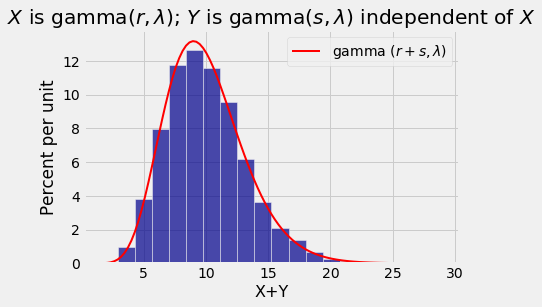

In [2]:
# Change these two parameters as you wish.
r = 3
s = 7

# Leave the rest of the code alone.
lam = 1
x = stats.gamma.rvs(r, scale=1/lam, size=10000)
y = stats.gamma.rvs(s, scale=1/lam, size=10000)
w = x+y
Table().with_column('X+Y', w).hist(bins=20)
t = np.arange(min(w), max(w)+0.1, (max(w) - min(w))/100)
dens = stats.gamma.pdf(t, r+s, scale=1/lam)
plt.plot(t, dens, color='red', lw=2, label='gamma $(r+s, \lambda)$')
plt.legend()
plt.title('$X$ is gamma$(r, \lambda)$; $Y$ is gamma$(s, \lambda)$ independent of $X$');


This result explains why the gamma $(r, \lambda)$ distribution looks roughly normal for large $r$. Read the text if you have trouble figuring it out; it's in the paragraph below the figure.

# <span style="color: darkblue">Sums of Squares of Standard Normals</span> #

## Reading 4: Chi-Squared ##

Let $Z$ be standard normal. In homework you showed that $Z^2$ is gamma $(1/2, 1/2)$.

Now let $Z_1, Z_2, \ldots, Z_n$ be i.i.d. standard normal variables.

The result about sums [implies](http://prob140.org/textbook/Chapter_18/04_Chi_Squared_Distributions.html#From-Chi-Squared-$(1)$-to-Chi-Squared-$(n)$) that the distribution of $Z_1^2 + Z_2^2 + \cdots + Z_n^2$ is gamma $(n/2, 1/2)$.

These are called the [chi-squared](http://prob140.org/textbook/Chapter_18/04_Chi_Squared_Distributions.html#Chi-Squared-with-$n$-Degrees-of-Freedom) distributions.

They arise frequently in statistics because centered (that is, mean 0) normal variables are often used as models for noise or measurement error in the data. The mean squared error is then a constant times the sum of squared errors, which is the variable that this section is about.

## Vitamin ##

It's been a long week. Instead of vitamins, here's a distribution that will be useful in your homework.

- You know that $Z_1^2 + Z_2^2$ is gamma $(1/2+1/2, 1/2)$, that is, gamma $(1, 1/2)$, which is exponential $(1/2)$.
- The square root of an exponential $(1/2)$ random variable has the [Rayleigh](http://prob140.org/textbook/Chapter_16/02_Monotone_Functions.html#Applying-the-Formula) distribution.

## You're done with another chapter!##